STT: 20

Họ và tên: Phạm Đức Thể

MSSV: 19522253

Lớp: DS105.M11.2

Buổi 04 - 08/11/2021

**Lưu ý**: Chạy lần lượt các câu từ 1-13


# [LAB 05: Model Development, Model Evaluation and Refinement](https://drive.google.com/file/d/1mjS46ZDoSQDPqUy-G4KqUlxu-BLevb-J/preview)

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import re
import matplotlib.pyplot as plt
from scipy import stats


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows
sns.set()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [ ]:
url_data = 'https://raw.githubusercontent.com/datasethub/ds105/master/Lab_Model_Development.csv'

## **Câu 1**. Tạo dataframe (df) lưu trữ dataset tại đường dẫn trên (chọn cách đọc load từ internet). Xuất 10 samples bất kỳ. Dataset có bao nhiêu sample, số lượng bao nhiêu feature.

In [ ]:
df = pd.read_csv(url_data)
# Xuất 10 samples bất kỳ
df.sample(10)

,curb-weight,engine-size,length,width,horsepower,city-mpg,highway-mpg,wheel-base,bore,price
179,2209,109,0.825084,0.909722,85.0,27,34,97.3,3.19,7975.0
50,1945,91,0.801538,0.891667,68.0,31,38,93.1,3.03,6695.0
3,2337,109,0.848630,0.919444,102.0,24,30,99.8,3.19,13950.0
154,2275,110,0.799135,0.894444,56.0,34,36,95.7,3.27,7898.0
110,3285,120,0.955790,0.950000,95.0,19,24,114.2,3.46,16695.0
46,3950,326,0.921192,0.980556,262.0,13,17,102.0,3.54,36000.0
42,2337,111,0.820279,0.858333,78.0,24,29,94.3,3.31,6785.0
177,3151,161,0.902451,0.923611,156.0,19,24,104.5,3.27,15750.0
182,2275,109,0.825084,0.909722,85.0,27,34,97.3,3.19,8495.0
146,1985,92,0.762614,0.883333,62.0,35,39,95.7,3.05,5348.0


In [ ]:
print('Dataset có {} sample và {} feature'.format(df.shape[0], df.shape[1]))

Dataset có 201 sample và 10 feature


**Nhận xét**: Dataset có 201 sample và 10 feature

## **Câu 2**. Kiểm tra kiểu dữ liệu của các feature `('curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore')` trong dataset có bị khuyết giá trị nào không?


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   curb-weight  201 non-null    int64  
 1   engine-size  201 non-null    int64  
 2   length       201 non-null    float64
 3   width        201 non-null    float64
 4   horsepower   201 non-null    float64
 5   city-mpg     201 non-null    int64  
 6   highway-mpg  201 non-null    int64  
 7   wheel-base   201 non-null    float64
 8   bore         201 non-null    float64
 9   price        201 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 15.8 KB


**Nhận xét**: Dataset không bị khuyết giá trị

## **Câu 3**. Phát triển mô hình Polynomial Regression bậc 3 để dự đoán giá xe từ biến `'highway-mpg'` (tên mô hình poly).

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
pf_cau3 = PolynomialFeatures(degree=3)
X_cau3 = df[['highway-mpg']]
X_poly_cau3 = pf_cau3.fit_transform(X_cau3)
y = df['price']

In [ ]:
model_cau3 = LinearRegression()
model_cau3.fit(X_poly_cau3, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model_cau3.intercept_

137923.59375765457

In [ ]:
model_cau3.coef_

array([ 0.00000000e+00, -8.96543312e+03,  2.04754306e+02, -1.55663829e+00])

## **Câu 4**. Tính MSE và R^2 để đánh giá tập mẫu của mô hình poly bằng phương pháp thủ công. Có thể phát họa distribution plot để đánh giá mô hình được không?

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Prediction
y_pred = model_cau3.predict(X_poly_cau3)

In [ ]:
# Định nghĩa Hàm lỗi Squared Sum (SSE)
def sse(y, y_pred):
  SSE = 0
  n = len(y)
  for i in range(n):
    difference = y[i] - y_pred[i]
    squared_difference = difference**2
    SSE += squared_difference

  return SSE

In [ ]:
# Định nghĩa hàm tính toán giá trị Mean Square Error (MSE)
def mse(y, y_pred):
  n = len(y) 
  MSE = sse(y, y_pred)/n  
  return MSE

In [ ]:
# Tính MSE bằng phương pháp thủ công
print("The Mean Square Error is: " , mse(y, y_pred))
# mean_squared_error(y, y_pred) # Gọi hàm

The Mean Square Error is:  20474146.426361185


In [ ]:
# Định nghĩa Hàm lỗi R Squared 
def r2(y, y_mean, y_pred):
  SSE_model = sse(y, y_pred)
  SSE_baseline = sse(y, y_mean)
  R2 = 1 - SSE_model/SSE_baseline
  return R2

In [ ]:
# Tính R^2 bằng phương pháp thủ công
y_mean = [y.mean()]*len(y)
print("The R Squared is: " , r2(y, y_mean, y_pred))
# r2_score(y, y_pred) # Gọi hàm

The R Squared is:  0.6741946663906522


Có thể phát họa distribution plot để đánh giá mô hình được

<Figure size 720x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot for highway-mpg and price')

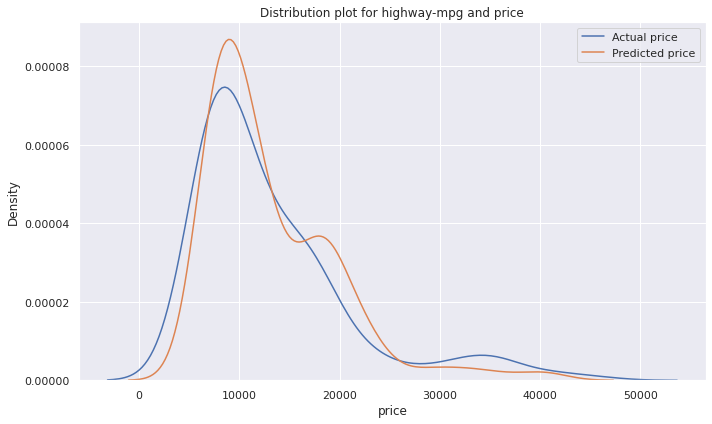

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(y, hist=False, label='Actual price')
sns.distplot(y_pred, hist=False, label='Predicted price')
plt.title('Distribution plot for highway-mpg and price')
plt.ticklabel_format(style='plain')
plt.tight_layout()
plt.legend()
plt.show()

## **Câu 5**. Phát triển mô hình hồi quy tuyến tính đa biến để dự đoán giá xe từ biến `'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'`.

In [ ]:
X_cau5 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']

In [ ]:
model_cau5 = LinearRegression()
model_cau5.fit(X_cau5, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model_cau5.predict(X_cau5)

In [ ]:
i = int(input('Nhập điểm dữ liệu cần để dự đoán (0-200): '))
print('Với điểm dữ liệu thứ {} có giá trị thực tế là {} ta có mô hình dự đoán được là {}'.format(i, y[i], y_pred[i]))

Nhập điểm dữ liệu cần để dự đoán (0-200): 5
Với điểm dữ liệu thứ 5 có giá trị thực tế là 15250.0 ta có mô hình dự đoán được là 13869.666732132428


## **Câu 6**. Tính MSE và R^2 để đánh giá tập mẫu của mô hình trên bằng phương pháp thủ công và gọi hàm. Có thể phát họa distribution plot để đánh giá mô hình được không?

In [ ]:
# Tính MSE
print("Giá trị MSE tính bằng phương pháp thủ công là: ", mse(y, y_pred))
print("Giá trị MSE tính bằng phương gọi hàm là: ", mean_squared_error(y, y_pred))

Giá trị MSE tính bằng phương pháp thủ công là:  11980366.870726483
Giá trị MSE tính bằng phương gọi hàm là:  11980366.87072649


In [ ]:
# Tính R2
y_mean = [y.mean()]*len(y)
print("Giá trị R2 tính bằng phương pháp thủ công là: ", r2(y, y_mean, y_pred))
print("Giá trị R2 tính bằng phương gọi hàm là: ", r2_score(y, y_pred))

Giá trị R2 tính bằng phương pháp thủ công là:  0.8093562806577457
Giá trị R2 tính bằng phương gọi hàm là:  0.8093562806577457


Có thể phát họa distribution plot để đánh giá mô hình được

<Figure size 720x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot for horsepower, curb-weight, engine-size, highway-mpg and price')

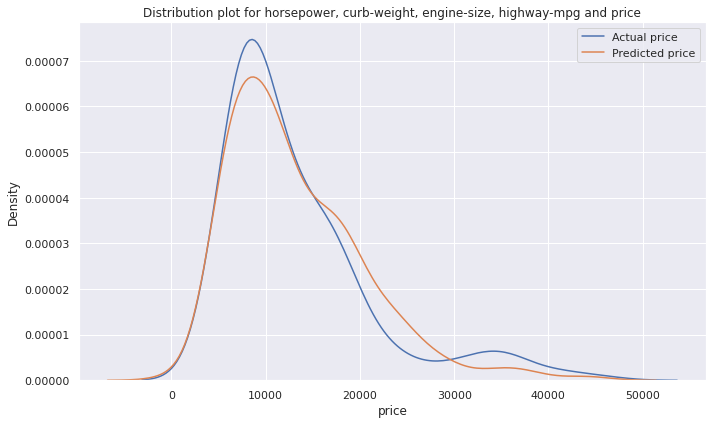

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(y, hist=False, label='Actual price')
sns.distplot(y_pred, hist=False, label='Predicted price')
plt.title('Distribution plot for horsepower, curb-weight, engine-size, highway-mpg and price')
plt.ticklabel_format(style='plain')
plt.tight_layout()
plt.legend()
plt.show()

## **Câu 7**. Phát triển mô hình Polynomial Regression bậc 2 để dự đoán giá xe từ biến `'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'`.

In [ ]:
pf_cau7 = PolynomialFeatures(degree=2)
X_cau7 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
X_poly_cau7 = pf_cau7.fit_transform(X_cau7)
y = df['price']

In [ ]:
model_cau7 = LinearRegression()
model_cau7.fit(X_poly_cau7, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model_cau7.intercept_

-21262.84827700755

In [ ]:
model_cau7.coef_

array([ 0.00000000e+00,  3.79990747e+02,  9.53081616e+00, -1.06265103e+02,
        1.82168928e+02,  1.69423474e+00, -1.86864385e-01, -1.29043091e+00,
       -2.14860065e+00,  7.57100954e-04,  1.11910005e-01, -1.92007463e-01,
        8.95252693e-02,  4.23869258e-02,  4.66019878e+00])

## **Câu 8**. Tính MSE và R^2 để đánh giá tập mẫu của mô hình trên bằng phương pháp thủ công và gọi hàm. Có thể phát họa distribution plot để đánh giá mô hình được không?

In [ ]:
# Prediction
y_pred = model_cau7.predict(X_poly_cau7)

In [ ]:
# Tính MSE
print("Giá trị MSE tính bằng phương pháp thủ công là: ", mse(y, y_pred))
print("Giá trị MSE tính bằng phương gọi hàm là: ", mean_squared_error(y, y_pred))

Giá trị MSE tính bằng phương pháp thủ công là:  9656613.403989585
Giá trị MSE tính bằng phương gọi hàm là:  9656613.403989587


In [ ]:
# Tính R2
y_mean = [y.mean()]*len(y)
print("Giá trị R2 tính bằng phương pháp thủ công là: ", r2(y, y_mean, y_pred))
print("Giá trị R2 tính bằng phương gọi hàm là: ", r2_score(y, y_pred))

Giá trị R2 tính bằng phương pháp thủ công là:  0.8463341969864729
Giá trị R2 tính bằng phương gọi hàm là:  0.846334196986473


Có thể phát họa distribution plot để đánh giá mô hình được

<Figure size 720x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot for horsepower, curb-weight, engine-size, highway-mpg and price')

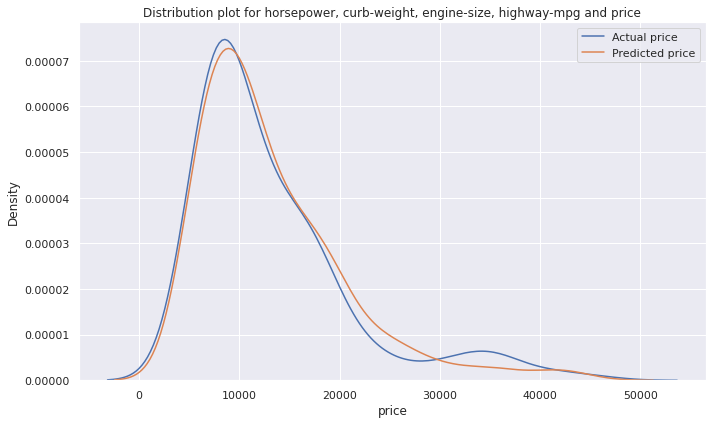

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(y, hist=False, label='Actual price')
sns.distplot(y_pred, hist=False, label='Predicted price')
plt.title('Distribution plot for horsepower, curb-weight, engine-size, highway-mpg and price')
plt.ticklabel_format(style='plain')
plt.tight_layout()
plt.legend()
plt.show()

## **Câu 9**. Thiết kế một pipeline để phát triển mô hình mô hình Polynomial Regression bậc 2 để dự đoán giá xe từ biến `'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'`. Trong pipeline thực hiện các công việc sau: Normalize, Transform => feature, LinearRegression để Fit tìm mô hình. Xuất mô hình vừa tìm được.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [ ]:
X_cau9 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('transform', PolynomialFeatures(degree=2)),
                 ('model', LinearRegression())])

In [ ]:
pipe.fit(X_cau9, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('transform',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
y_pipe = pipe.predict(X_cau9)

In [ ]:
print('Training set score: ', pipe.score(X_cau9, y))
print('Training MSE: ', mean_squared_error(y_pipe, y))
print('Training R2: ', r2_score(y_pipe, y))

Training set score:  0.8463341969864728
Training MSE:  9656613.403989598
Training R2:  0.8184336594684674


In [ ]:
y_pipe[0:5]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

In [ ]:
y[0:5]

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

## **Câu 10**. Tìm khoảng giá trị chặn của các mô hình.


<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Regplot for highway-mpg and price')

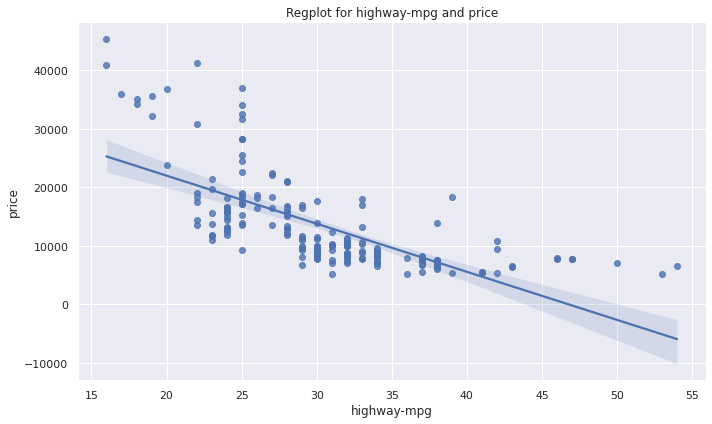

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = df['highway-mpg'], y = df['price'])
plt.title('Regplot for highway-mpg and price')
plt.ticklabel_format(style='plain')
# plt.ylim(0,50000)
plt.tight_layout()
plt.show()

In [ ]:
print('Khoảng chặn dưới (giá trị nhỏ nhất) của mô hình: price =', df['price'].min())
print('Khoảng chặn trên (giá trị nhỏ nhất) của mô hình: highway-mpg =', df['highway-mpg'].min())

Khoảng chặn dưới (giá trị nhỏ nhất) của mô hình: price = 5118.0
Khoảng chặn trên (giá trị nhỏ nhất) của mô hình: highway-mpg = 16


**Nhận xét:**: Đối với mô hình hồi quy đơn biến có `feature = highway-mpg`, `target = price` ta có:

+ Khoảng giá trị chặn dưới của mô hình là `y = 0 hay price = 0`. $y \in [0; 25,000]$
+ Khoảng giá trị chặn trên của mô hình là `x = 16 hay highway-mpg = 16`. $x \in [16;47]$

## **Câu 11**. Xếp hạng các mô hình đã phát triển các câu trên.

| Rank | Model | Features | MSE | $R^2$ |
| ---- | ---- | ---- | ---- | ---- |
| 1 | Câu 7: Polynomial Regression bậc 2 | `'horsepower'`,<br> `'curb-weight'`, <br> `'engine-size'`,<br> `'highway-mpg'` | 9656613.403989587 | 0.846334196986473 | 
| 2 | Câu 9: Polynomial Regression bậc 2 | `'horsepower'`,<br> `'curb-weight'`, <br> `'engine-size'`,<br> `'highway-mpg'` | 9656613.403989598 | 0.8184336594684674 | 
| 3 | Câu 5: Linear Regression | `'horsepower'`,<br> `'curb-weight'`, <br> `'engine-size'`,<br> `'highway-mpg'` | 11980366.87072649 | 0.8093562806577457 | 
| 4 | Câu 3: Polynomial Regression bậc 3 | `'highway-mpg'` | 20474146.426361185 | 0.6741946663906522 |

## **Câu 12**. *Anh/chị có thể phát triển một mô hình nào khác tốt hơn các mô hình đã phát triển bên trên. Nếu có thì chứng minh mô hình của bạn là tốt hơn?

Có thể phát triển một mô hình khác tốt hơn các mô hình đã phát triển bên trên.

In [ ]:
Features = df[['curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore']]
target = df['price']

In [ ]:
Pipe = Pipeline([('transform', PolynomialFeatures(degree=2)),
                 ('model', LinearRegression())])

In [ ]:
Pipe.fit(Features, target)

Pipeline(memory=None,
         steps=[('transform',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
y_Pipe = Pipe.predict(Features)

In [ ]:
print('Training set score: ', Pipe.score(Features, target))
print('Training MSE: ', mean_squared_error(y_Pipe, target))
print('Training R2: ', r2_score(y_Pipe, target))

Training set score:  0.939132872349268
Training MSE:  3824991.0468542143
Training R2:  0.9360896819521844


**Nhận xét**: Mô hình có $R^2 \sim 93.6\%$ và $MSE \sim 3,824,991$, trong khi các mô hình bên trên thì tốt nhất là mô hình có $R^2 \sim 84,7\%$ và $MSE \sim 9,656,613$. Vậy mô hình này đã tốt hơn các mô hình đã phát triển bên trên.

## **Câu 13**. Viết hàm trả về kết quả dự đoán từ một hoặc nhiều feature thuộc `'curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore'`.


In [ ]:
features = ['curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore']

In [ ]:
def train_model(*features):
  X_train_cau13 = df[features[0]].values
  y_train = df.loc[:,'price']
  lr_cau13 = LinearRegression()
  return lr_cau13.fit(X_train_cau13, y_train), lr_cau13.score(X_train_cau13, y_train)

In [ ]:
model_cau13 = {}
while True:
  print('Danh sách các feature có thể sử dụng để train model:')
  for i in range(len(features)):
    print(i, ':', features[i])
  index = input('Nhập danh sách chỉ số của feature muốn sử dụng để train model:').split()
  key = 'model_with_feature'
  lst_features = []
  for i in index:
    key += '_' + features[int(i)]
    lst_features.append(features[int(i)])

  model_cau13[key] = train_model(lst_features)
  print('='*10 + 'Bạn có muốn tiếp trục train model hay không?' + '='*10)
  Continue = int(input('1 - tiếp tục \n-1 - kết thúc'))
  if Continue == -1:
    break

Danh sách các feature có thể sử dụng để train model:
0 : curb-weight
1 : engine-size
2 : length
3 : width
4 : horsepower
5 : city-mpg
6 : highway-mpg
7 : wheel-base
8 : bore
Nhập danh sách chỉ số của feature muốn sử dụng để train model:0 1 5
==========Bạn có muốn tiếp trục train model hay không?==========
1 - tiếp tục 
-1 - kết thúc1
Danh sách các feature có thể sử dụng để train model:
0 : curb-weight
1 : engine-size
2 : length
3 : width
4 : horsepower
5 : city-mpg
6 : highway-mpg
7 : wheel-base
8 : bore
Nhập danh sách chỉ số của feature muốn sử dụng để train model:1 7 6 4
==========Bạn có muốn tiếp trục train model hay không?==========
1 - tiếp tục 
-1 - kết thúc1
Danh sách các feature có thể sử dụng để train model:
0 : curb-weight
1 : engine-size
2 : length
3 : width
4 : horsepower
5 : city-mpg
6 : highway-mpg
7 : wheel-base
8 : bore
Nhập danh sách chỉ số của feature muốn sử dụng để train model:1 2 4 8 7
==========Bạn có muốn tiếp trục train model hay không?==========
1 - tiếp tục 
-

In [ ]:
model_cau13

{'model_with_feature_city-mpg': (LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  0.4713797473570377),
 'model_with_feature_curb-weight_engine-size_city-mpg': (LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  0.7988383571740653),
 'model_with_feature_engine-size_length_horsepower_bore_wheel-base': (LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  0.8079821340391884),
 'model_with_feature_engine-size_wheel-base_highway-mpg_horsepower': (LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  0.8073308946517107)}